In [1]:
%load_ext autoreload
import os
os.chdir(os.path.abspath(os.curdir).replace('notebooks',''))

In [2]:
import datetime
from tqdm import trange
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', 120)

In [3]:
%autoreload 2

from src.database import ElasticTransformers

In [4]:
from sentence_transformers import SentenceTransformer

bert_embedder = SentenceTransformer('bert-base-nli-mean-tokens')

In [5]:
def embed_wrapper(ls):
    """
    Helper function which simplifies the embedding call and helps lading data into elastic easier
    """
    results=bert_embedder.encode(ls, convert_to_tensor=True)
    results = [r.tolist() for r in results]
    return results


In [6]:
et=ElasticTransformers(index_name='et-large')
et.ping()

True

# Search Experiments

To analyse results, I compared top results side by side on a few searches. 

Approach is to take the top 10 hits, after removing some of the noisy results (duplicates or “headlines” of just one word).


In [7]:
def select_search_results(df,top_n=10):
    # four tokens or more (filtering out some meaningless headlines)
    df=df[df.headline_text.apply(lambda x: len(x.split())>4)].copy()
    # remove exact duplicates
    df=df.groupby('headline_text', as_index=False).first()
    df=df.sort_values('_score',ascending=False)
    df=df.reset_index(drop=True)
    return df.head(top_n)

In [31]:
query='virus threat'
print('KEYWORD SEARCH RESULTS')
df0=et.search(query,'headline_text',type='match',embedder=embed_wrapper, size = 1000)
display(select_search_results(df0))
print('CONTEXTUAL SEARCH RESULTS')
df1=et.search(query,'headline_text',type='dense',embedder=embed_wrapper, size = 1000)
display(select_search_results(df1))



KEYWORD SEARCH RESULTS


,headline_text,_score
0,public warned of mozzie virus threat,13.311735
1,cattle producers warned of virus threat,13.311735
2,expert plays down hendra virus threat,13.295192
3,residents reminded of mozzie virus threat,13.213888
4,mozzie virus threat sparks health alert,13.213888
5,report reveals lower mozzie virus threat,13.213888
6,hendra like virus identified as potential threat,12.498677
7,hendra virus poses constant threat chief vet,12.498677
8,public warned of mossie borne virus threat,12.498677
9,sunraysia fears watermelon virus threat from nt,12.483357


CONTEXTUAL SEARCH RESULTS


,headline_text,_score
0,hendra like virus identified as potential threat,1.859408
1,hendra report author warns of virus risk,1.853364
2,fresh concerns over hendra virus outbreak,1.836927
3,virus puts giteau in doubt,1.823136
4,hendra virus case under investigation,1.817768
5,who highlight dangers of vector borne diseases,1.804388
6,potentially deadly virus sparks mozzie warning,1.799419
7,who warns threat from vector borne diseases,1.793783
8,fears as png diseases spread,1.791913
9,deadly hendra virus strikes again,1.788590


In [32]:
df11=select_search_results(df1,1000)

df11[df11.headline_text.apply(lambda x: all([q not in x for q in query.split()]))].head(10)


,headline_text,_score
5,who highlight dangers of vector borne diseases,1.804388
8,fears as png diseases spread,1.791913
21,the odds of an outbreak,1.773913
25,flood waters carry risk of disease infection,1.769219
27,port uncertain of impact of viral meningitis outbreak,1.767367
30,human error blamed for infection scare,1.764524
34,oakey defence base contaminants linked to serious disease,1.758969
35,dangerous parasite rife in nt,1.757938
40,academic fears spread of mozzie borne disease,1.755103
44,sti symptoms dangers and treatments,1.751830


In [35]:
query='natural disaster'
print('KEYWORD SEARCH RESULTS')
df0=et.search(query,'headline_text',type='match',embedder=embed_wrapper, size = 1000)
display(select_search_results(df0,10))
print('CONTEXTUAL SEARCH RESULTS')
df1=et.search(query,'headline_text',type='dense',embedder=embed_wrapper, size = 1000)
display(select_search_results(df1,10))



KEYWORD SEARCH RESULTS


,headline_text,_score
0,perth storm a natural disaster,16.165108
1,more natural disaster planning needed,16.165108
2,gunnedah declared natural disaster area,16.165108
3,bushfire prompts natural disaster declaration,16.165108
4,maclean fire not natural disaster,16.032738
5,state helps natural disaster victims,15.960692
6,esperance declared natural disaster area,15.960692
7,flooding sparks natural disaster declarations,15.960692
8,government declares natural disaster areas,15.960692
9,nsw natural disaster zone widened,15.960692


CONTEXTUAL SEARCH RESULTS


,headline_text,_score
0,natural disaster declared in broken hill,1.879506
1,natural disaster declared in storm area,1.877636
2,lismore declared a natural disaster area,1.867503
3,broken hill declared a natural disaster area,1.854052
4,natural disasters take toll on austar,1.848880
5,perth storm a natural disaster,1.836232
6,call for nambucca valley natural disaster,1.834766
7,wagga albury declared natural disaster areas,1.831764
8,ballina area declared natural disaster zone,1.823700
9,disasters take toll on shire,1.822510


In [36]:
df11=select_search_results(df1,1000)

df11[df11.headline_text.apply(lambda x: all([q not in x for q in query.split()]))].head(10)


,headline_text,_score
28,power supply at risk if flood situation worsens,1.787914
36,widespread damage from freak storm,1.779122
40,catastrophic fire conditions for wa,1.776245
43,leigh creek ucg project lifeline or toxic environmental hazard,1.772300
46,qlds wild weather caused by freak event,1.770647
48,wild weather causes qld flooding,1.769357
50,cyclone damaged water supply fixed,1.767906
53,humungous effort on catastrophic day,1.766371
56,nsw floods receding water reveals destruction,1.766130
58,cyclone olwyn carnarvon water supply problems,1.765932


In [24]:
#query='virus threat'
query='regulatory risk banking reform'
print('KEYWORD SEARCH RESULTS')
df0=et.search(query,'headline_text',type='match',embedder=embed_wrapper, size = 1000)
display(select_search_results(df0,10))
print('CONTEXTUAL SEARCH RESULTS')
df1=et.search(query,'headline_text',type='dense',embedder=embed_wrapper, size = 1000)
display(select_search_results(df1,10))



KEYWORD SEARCH RESULTS


,headline_text,_score
0,regulatory madness in the banking world,18.955673
1,china pushes through banking sector reform,14.721983
2,swan to announce banking reform package,14.582440
3,open banking more choice or data risk,13.001936
4,swan wraps up meeting on banking rules reform,12.904054
5,govt internet regulatory plan criticised,12.000524
6,regulatory duplication strangling aquaculture development,12.000524
7,us flags financial regulatory reforms,11.530772
8,mcconnell a regulatory train wreck,11.530772
9,billabong rescue package clears regulatory hurdle,11.220221


CONTEXTUAL SEARCH RESULTS


,headline_text,_score
0,us flags financial regulatory reforms,1.863391
1,the banking royal commissions recommendations,1.850401
2,what can we expect from the banking inquiry,1.841991
3,banking royal commission superannuation hearings,1.836119
4,banking royal commission anz financial advice clients interest,1.833776
5,rba considers cap on credit card surcharges,1.832314
6,rba on banks interest rate moves,1.831732
7,will changes to financial advice laws see the,1.831395
8,commonwealth bank responds to financial planning inquiry,1.831379
9,reserve bank financial stability review,1.830978


# Speed comparison

Below we perform some non-functional testing on the impact of size of index together with search parameters on time of the query.  
We have tested with 3 index sizes: 1k (Tiny), 100k (Medium) & 1.1mn (Large). We have not paid particular attention to and sampling effects, meaning that for instance, the 1k index is simply the first 1000 headlines in the data, this might mean ti is not well randomized, which we have not studied

In [38]:

queries=['Amazon','news','security thread','tech news','new vaccine developed new cure','results game today all winners']
result_sizes=[1,10,100]
repeat=10

col_names=['search index','search type','search size' , 'query', '# tokens query','repeat','time taken']
search_to_compare={'match':'Keyword Search','dense':'Contextual Search',}
indices_to_compare={'et-tiny':'Tiny','et-medium':'Medium','et-large':'Large'}

res=[]
for i in trange(repeat):
    for index in indices_to_compare:
        for search_type in search_to_compare:
            for query in queries:
                for size in result_sizes:
                    t0=datetime.datetime.now()
                    _ = et.search(query=query,
                                  field='headline_text',
                                  index_name=index,
                                  type=search_type,
                                  embedder=embed_wrapper, 
                                  size=size)
                    t1=datetime.datetime.now()
                    time_taken=(t1-t0).total_seconds()
                    res.append([indices_to_compare[index], search_to_compare[search_type], size, query, len(query.split()), i,time_taken])
                    
result_df=pd.DataFrame(res, columns=col_names)
result_df.to_csv('data/results_search.csv')


100%|██████████| 10/10 [26:27<00:00, 158.76s/it]


Compare speed across different index sizes and search types for
- query token length
- result size
- index size

Results are below

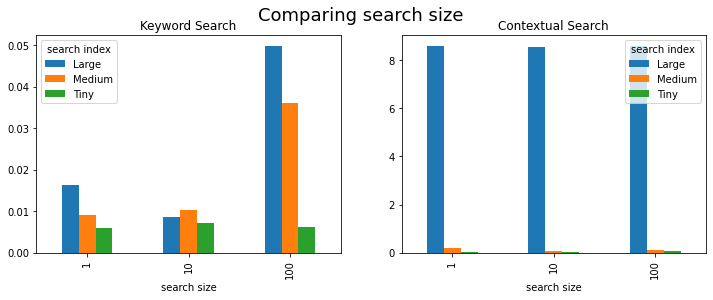

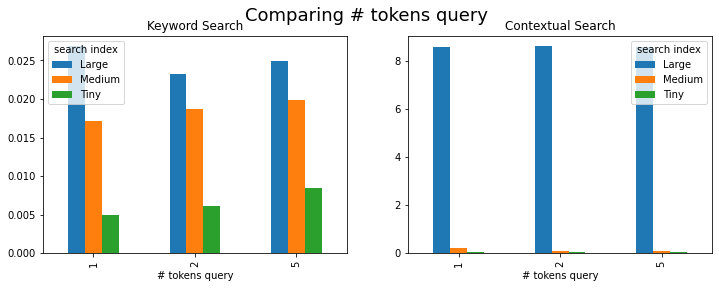

In [39]:
compare='search size' #'# tokens query'
compare='# tokens query'
comparisons=['search size', '# tokens query']

for compare in comparisons:
    fig, axes = plt.subplots(nrows=1, ncols=len(search_to_compare), figsize=(12,4))
    fig.suptitle(f'Comparing {compare}',size=18)
    for (c,search_type) in enumerate(search_to_compare.values()):
        pvt=pd.pivot_table(result_df[(result_df['search type']==search_type)&(result_df['repeat']>2)] \
                           [['search index',compare,'time taken']],\
                    values='time taken',
                    index=compare,
                    columns='search index',
                    aggfunc='mean',
                  )
        pvt.plot.bar(title=search_type,ax=axes[c]) 


The below box plot analyzes the deviation in search times after multiple repeated calls. Although some deviations are observed, they do not seem to be significant. Only results from the Large index are shown

<AxesSubplot:>

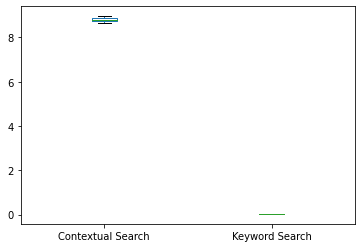

In [17]:
box_df=result_df[(result_df['search index']=='Large')].copy()
pd.pivot_table(box_df[['search type','time taken','repeat']],
               values='time taken',
                    index='repeat',
                    columns='search type',
                    aggfunc='mean',).plot.box()